In [1]:
import pybamm

In [2]:
options = {'operating mode': 'current', 'dimensionality': 0, 'surface form': 'false', 'convection': 'none',
           'side reactions': [], 'interfacial surface area': 'constant', 'current collector': 'uniform',
           'particle': 'Fickian diffusion', 'particle shape': 'spherical', 'electrolyte conductivity': 'default',
           'thermal': 'isothermal', 'cell geometry': 'arbitrary', 'external submodels': [], 'SEI': 'none',
           'lithium plating': 'none', 'SEI porosity change': 'false', 'lithium plating porosity change': 'false',
           'loss of active material': 'none', 'working electrode': 'none', 'particle cracking': 'none',
           'total interfacial current density as a state': 'false', 'SEI film resistance': 'none'
          }
chemistry = pybamm.parameter_sets.Chen2020
parameters = pybamm.ParameterValues(chemistry=chemistry)
experiment = pybamm.Experiment(
    [
        (
            "Discharge at C/10 for 10 hours or until 3.5 V",
            "Rest for 1 hour",
            "Charge at 1 A until 4.1 V",
            "Hold at 4.1 V until 50 mA",
            "Rest for 1 hour"),
    ]
)
model = pybamm.lithium_ion.DFN(options=options)
sim = pybamm.Simulation(model=model, experiment=experiment, parameter_values=parameters)
sim.solve()

## Select Plots

In [18]:
potential_plots = ["Terminal voltage [V]", "Negative electrode potential [V]", "Electrolyte potential [V]",
                   "Separator electrolyte potential [V]", "Positive electrode potential [V]"]
current_density_plots = ['Current [A]', 'Total current density [A.m-2]',  'Exchange current density [A.m-2]', 
                        'Negative electrode current density [A.m-2]', 'Electrolyte current density [A.m-2]',
                         'Positive electrode current density [A.m-2]']
concentration_plots = ['Negative electrolyte concentration [mol.m-3]', 'Separator electrolyte concentration [mol.m-3]',
                       'Positive electrolyte concentration [mol.m-3]'
                       ]

## Plots of potential
#### Discharge at C/10 for 10 hours or until 3.5 V
As the cell discharges, the concentration lithium in the cathode increases. This results in a decrease in the terminal potential.
#### Charge at 1 A until 4.1 V
As the cell charges, the concentration lithium in the cathode decreases. This results in an increase in the terminal potential.

Widget Javascript not detected.  It may not be installed or enabled properly.


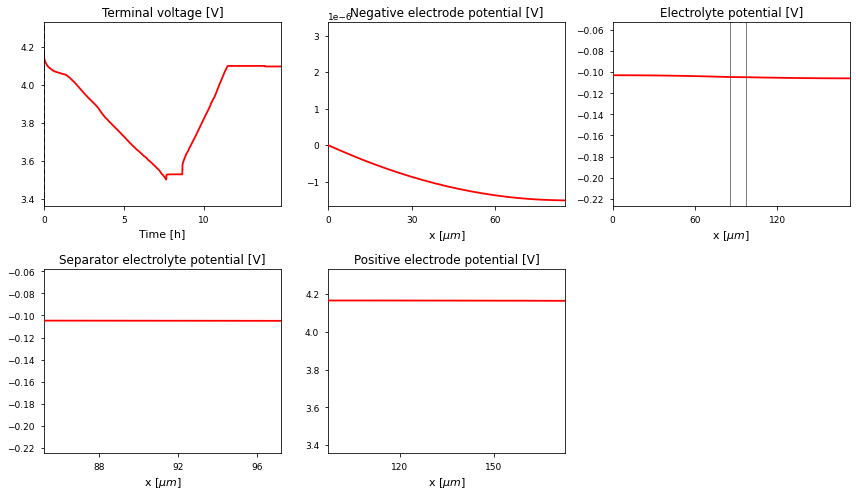

In [19]:
sim.plot(potential_plots)

## Current density

Widget Javascript not detected.  It may not be installed or enabled properly.


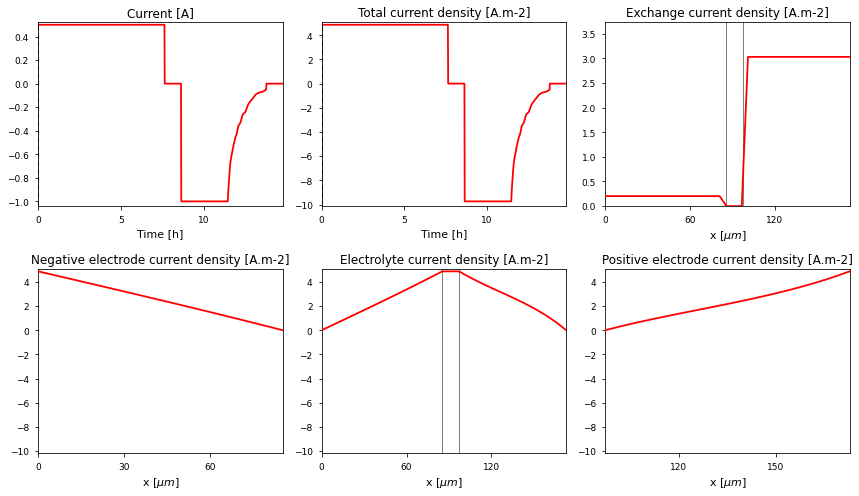

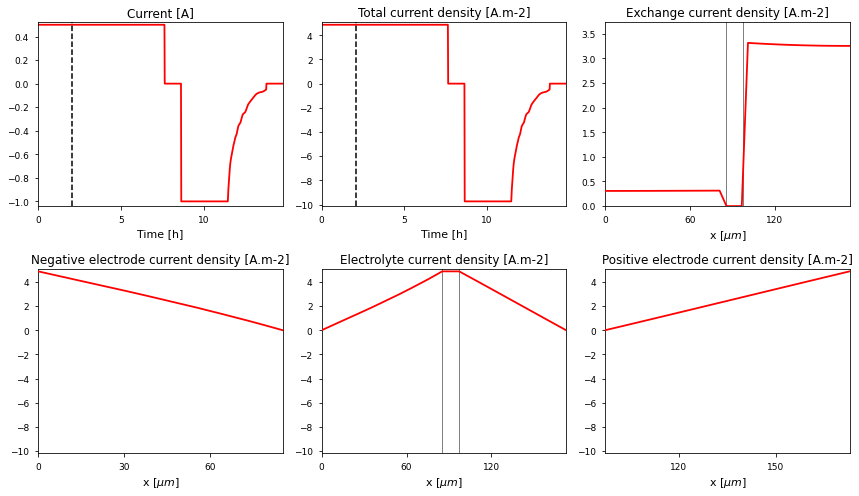

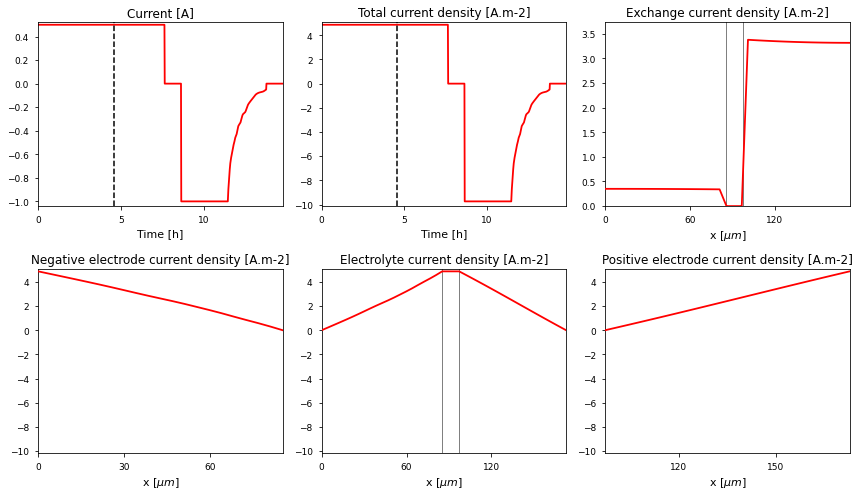

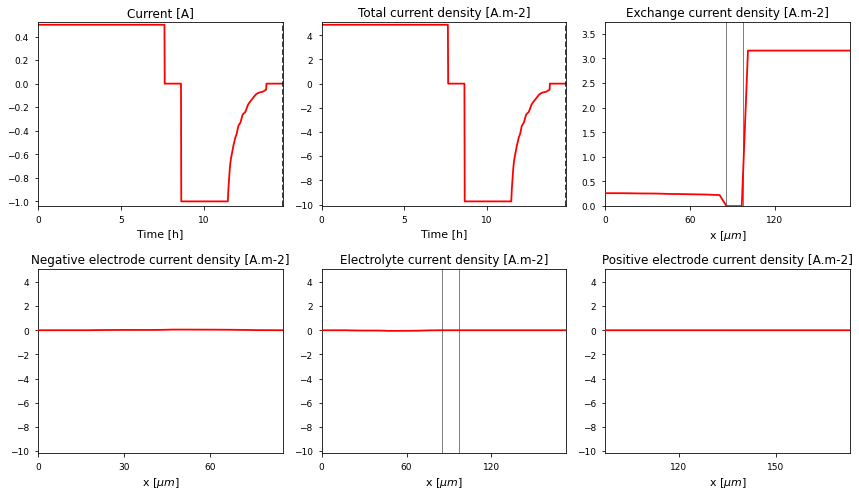

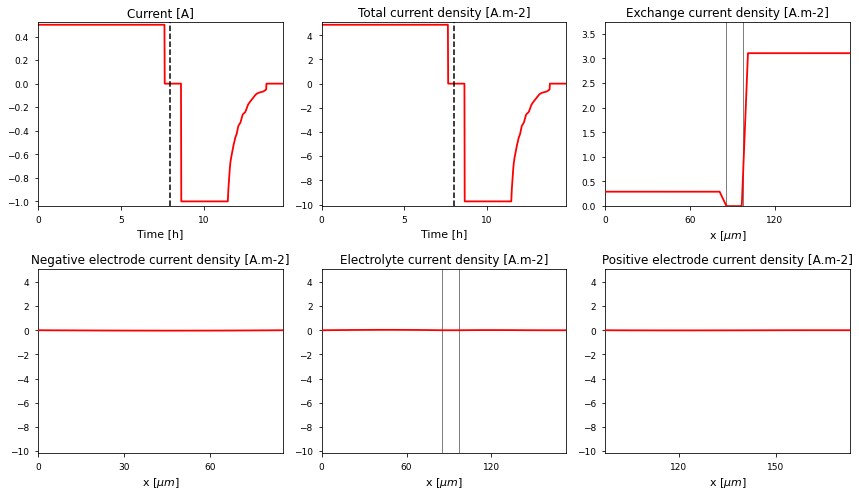

In [20]:
sim.plot(current_density_plots)

In [7]:
model.variables.search('separator')

Gradient of separator electrolyte potential
Leading-order separator porosity
Leading-order x-averaged separator porosity
Leading-order x-averaged separator porosity change
Separator electrolyte concentration
Separator electrolyte concentration [Molar]
Separator electrolyte concentration [mol.m-3]
Separator electrolyte potential
Separator electrolyte potential [V]
Separator porosity
Separator porosity change
Separator pressure
Separator temperature
Separator temperature [K]
Separator tortuosity
Separator transverse volume-averaged acceleration
Separator transverse volume-averaged acceleration [m.s-2]
Separator transverse volume-averaged velocity
Separator transverse volume-averaged velocity [m.s-2]
Separator volume-averaged acceleration
Separator volume-averaged acceleration [m.s-1]
Separator volume-averaged velocity
Separator volume-averaged velocity [m.s-1]
X-averaged separator electrolyte concentration
X-averaged separator electrolyte concentration [mol.m-3]
X-averaged separator elec

## Concentration plots
The smallest time other than 0 selectable from the slide is 0.15 hours. Therefore, we cannot plot concentration profiles at short times.

Widget Javascript not detected.  It may not be installed or enabled properly.


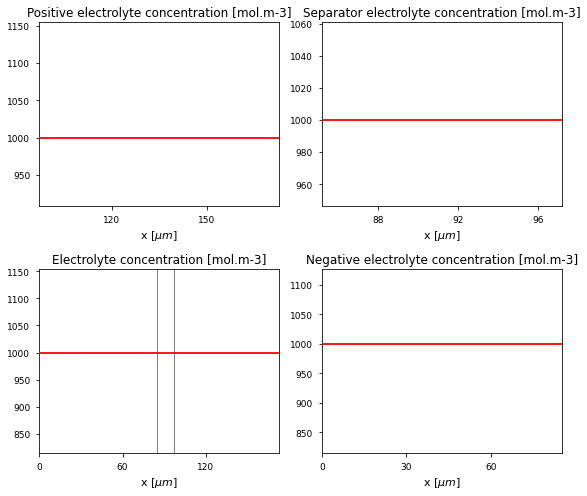

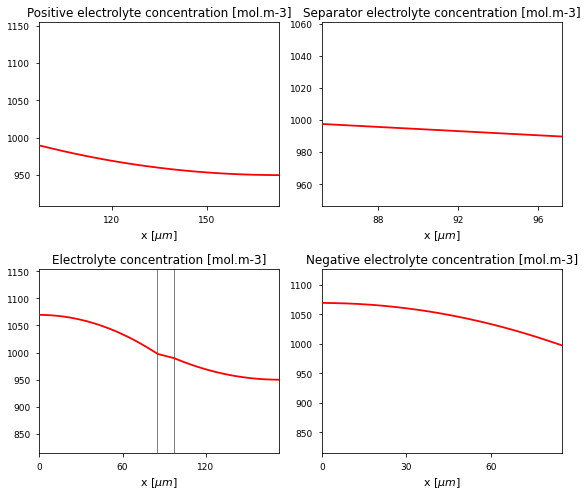

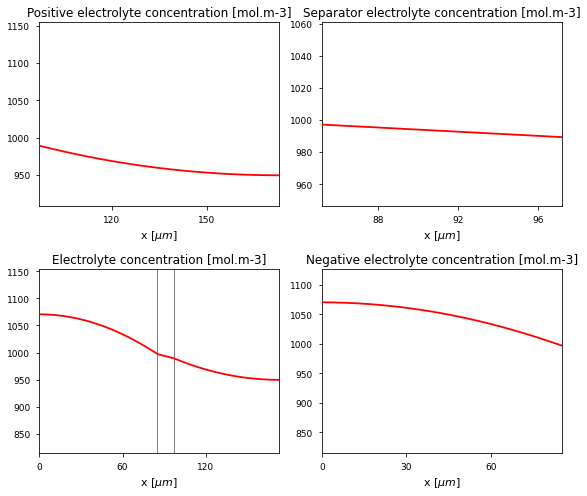

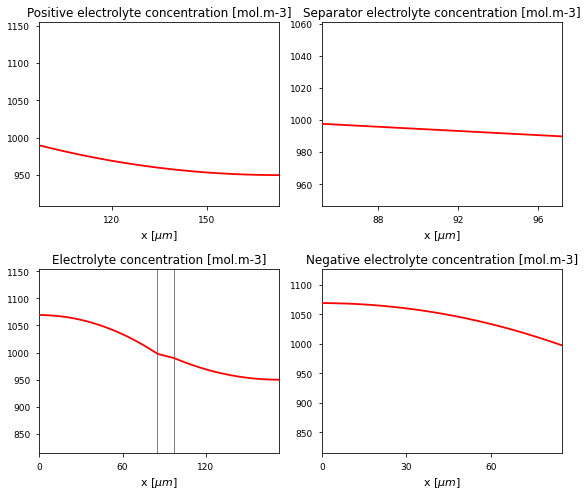

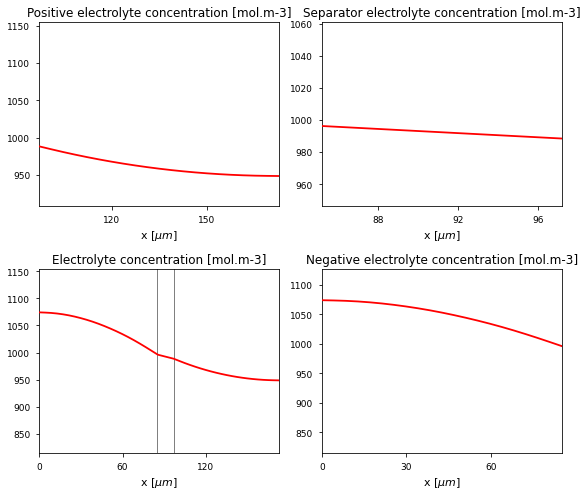

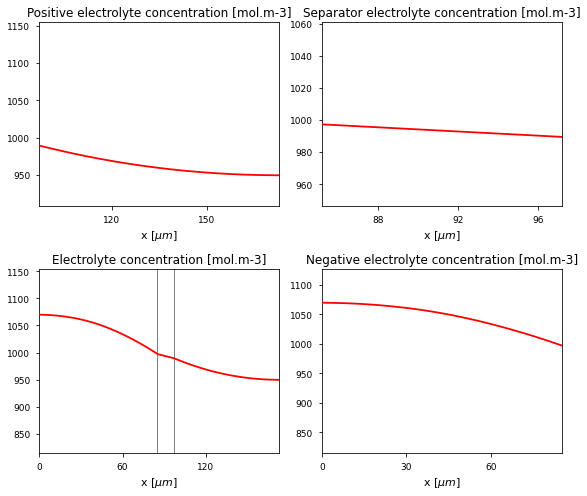

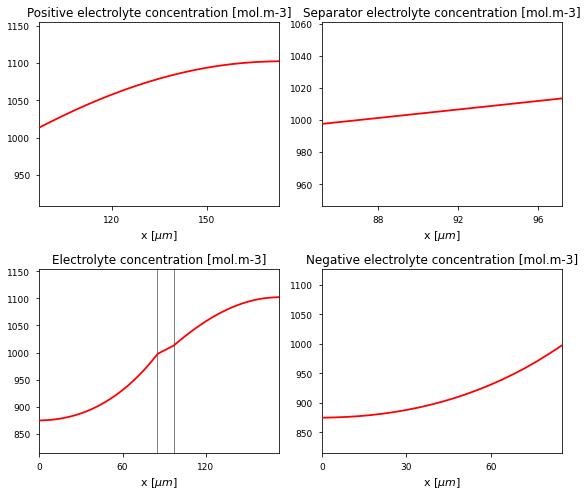

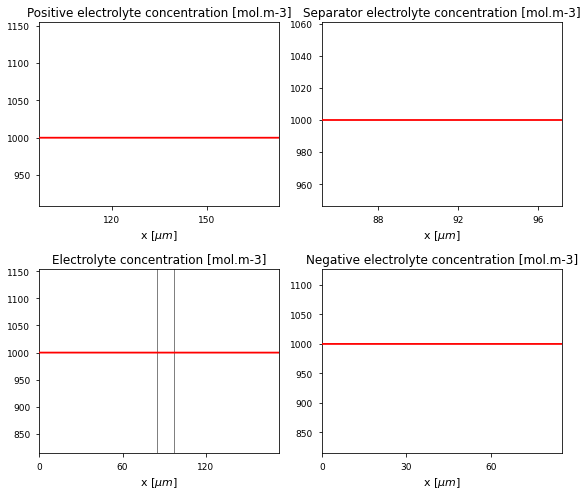

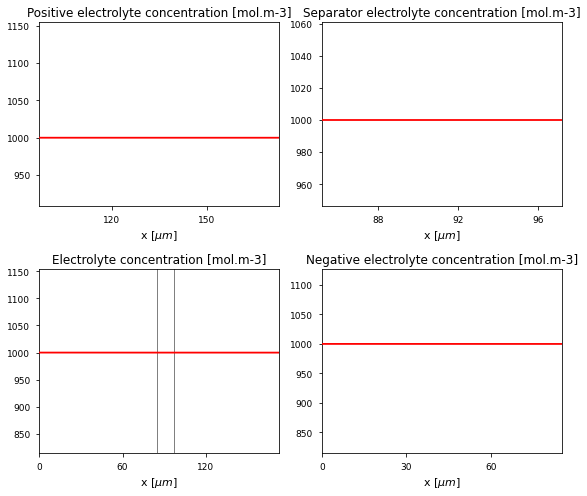

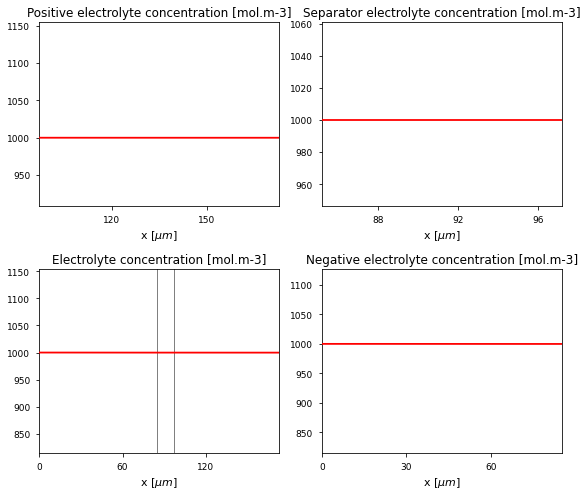

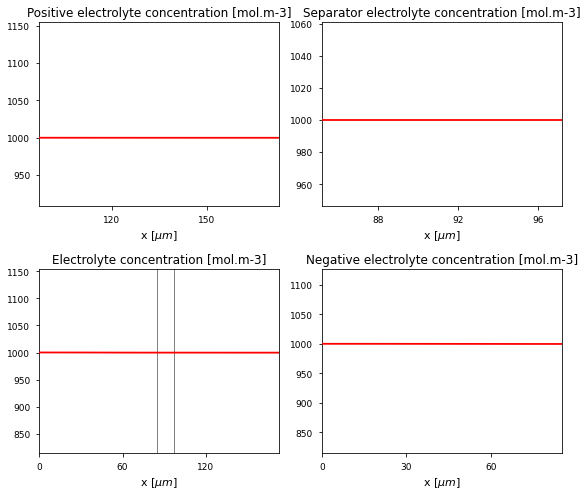

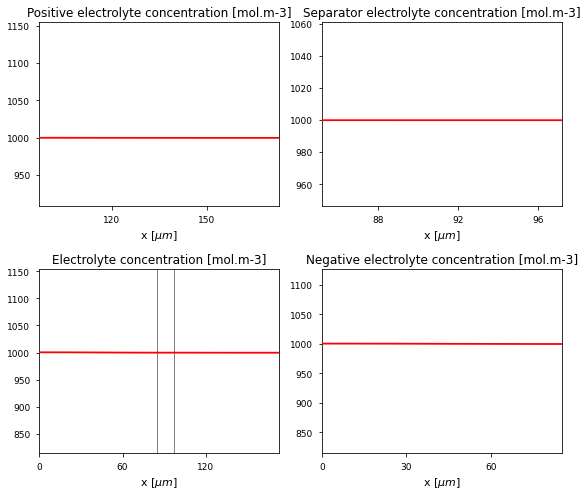

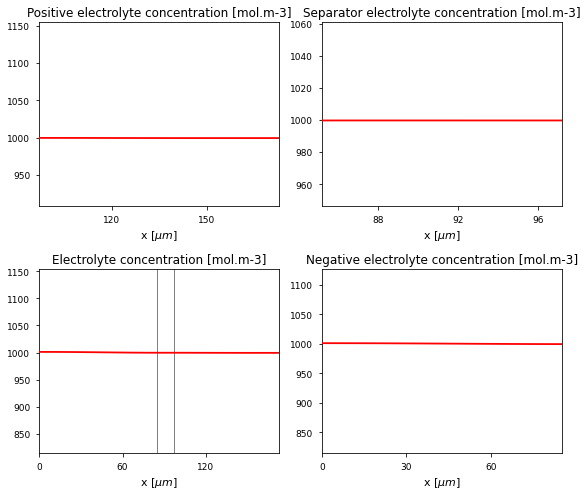

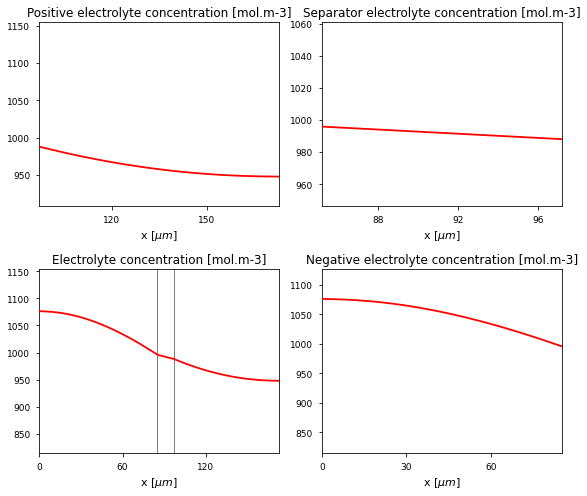

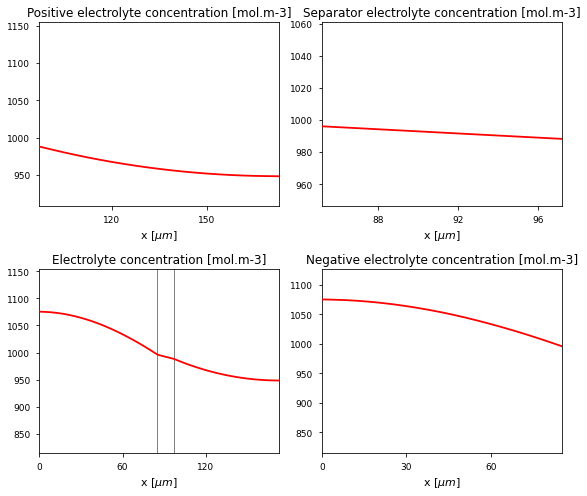

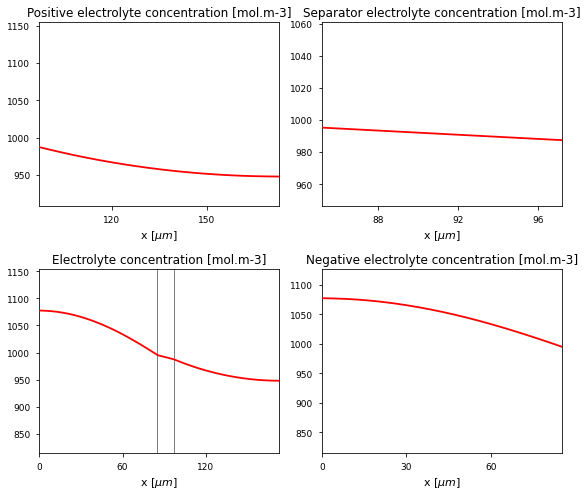

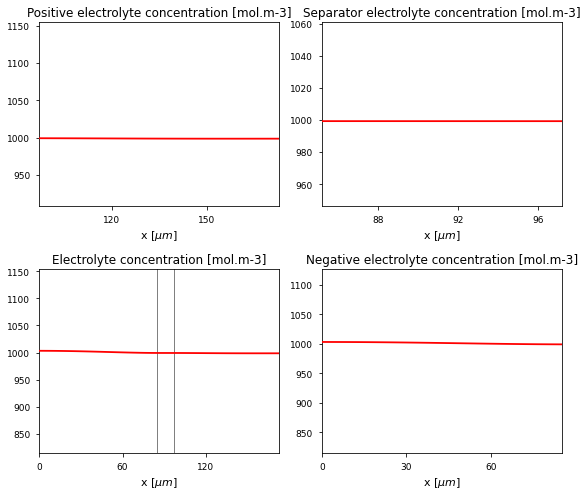

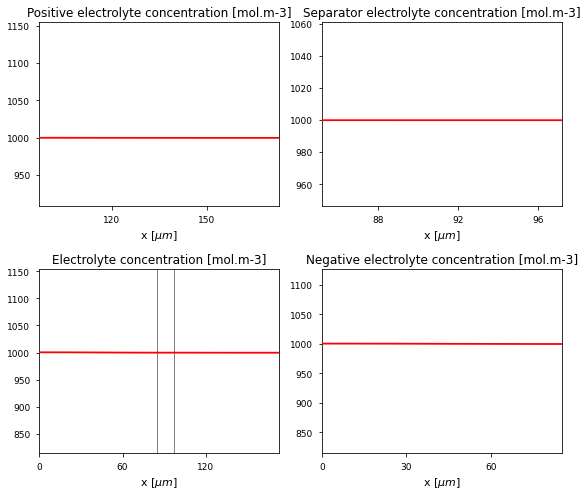

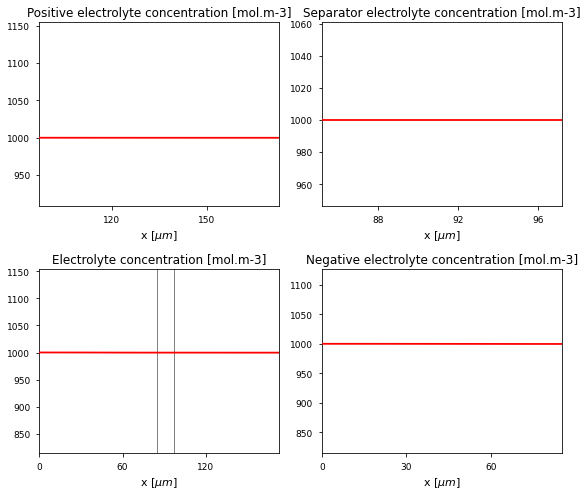

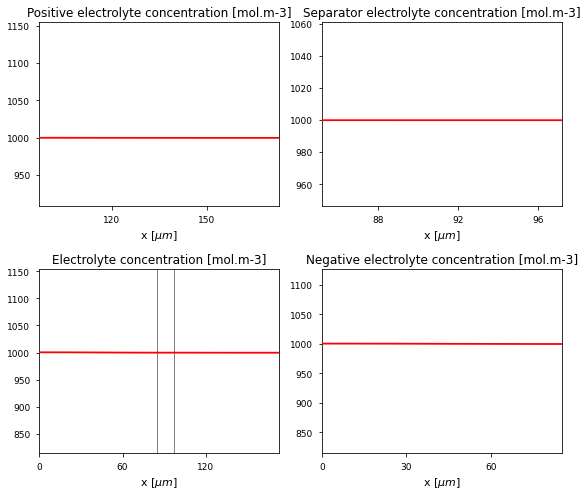

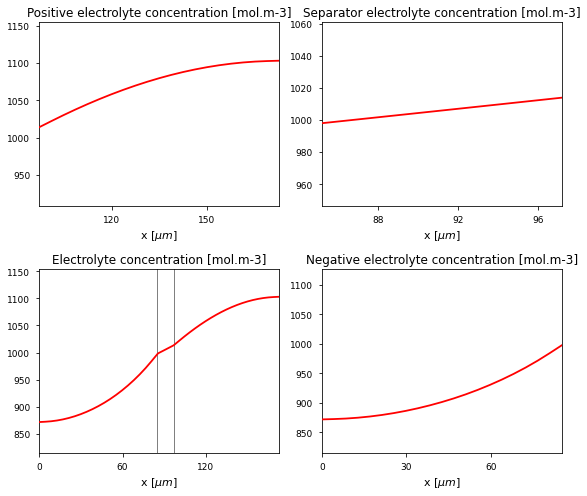

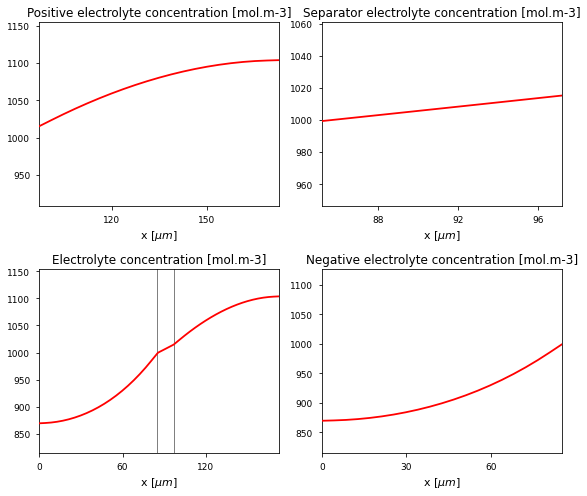

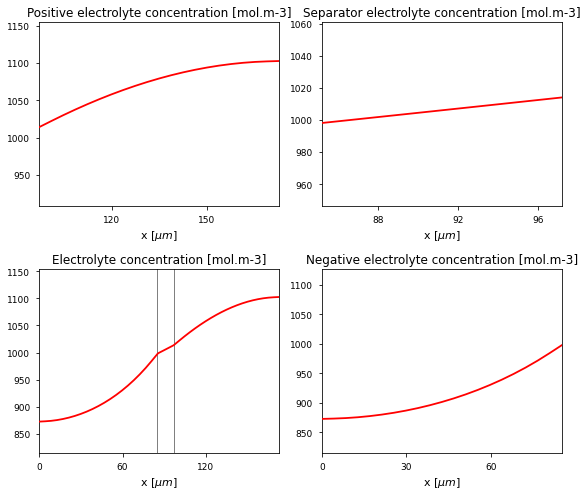

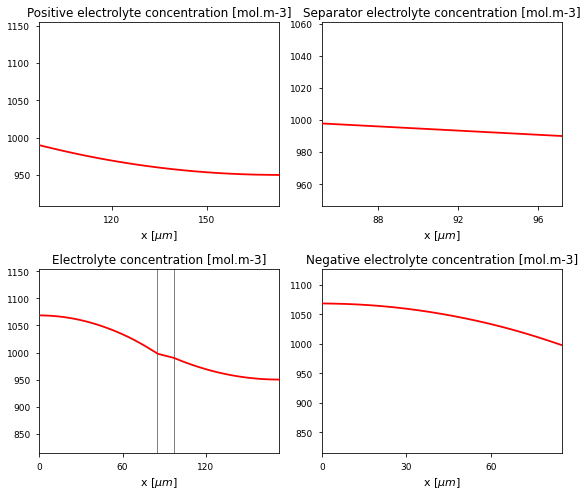

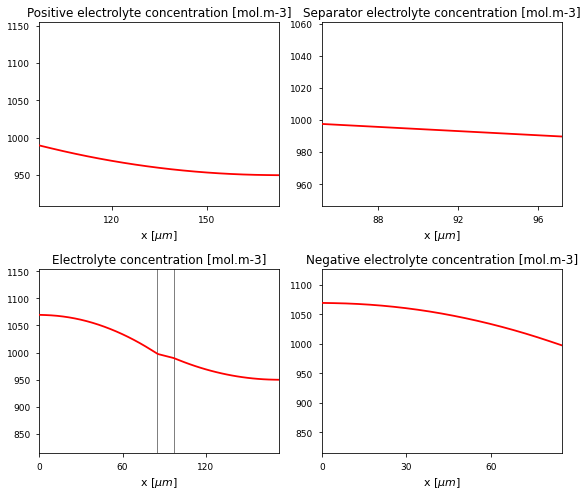

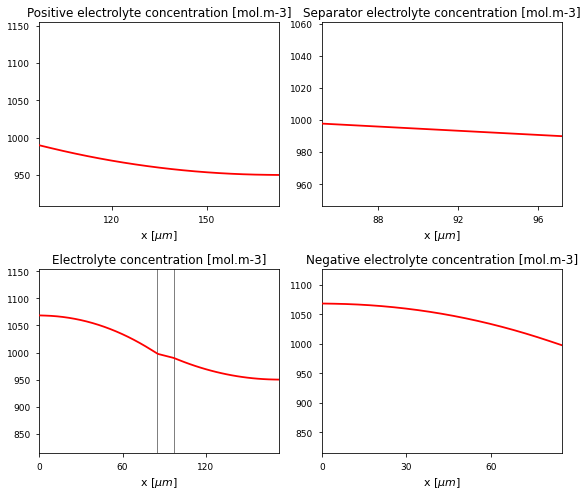

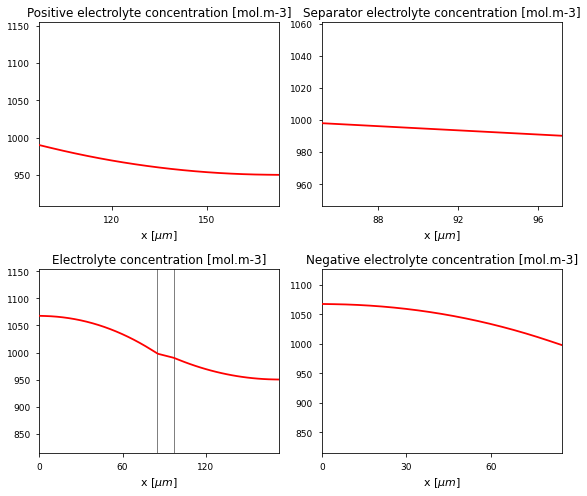

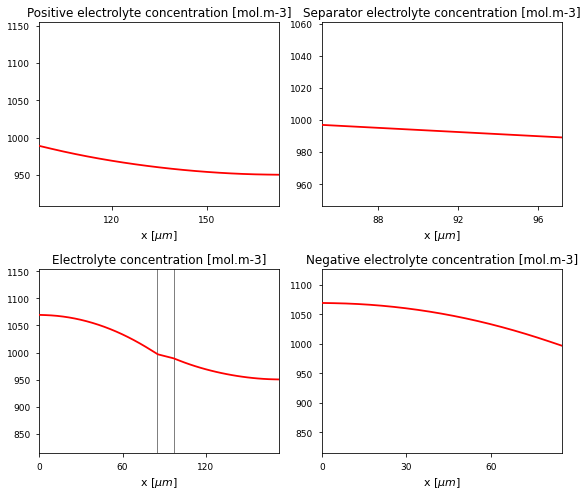

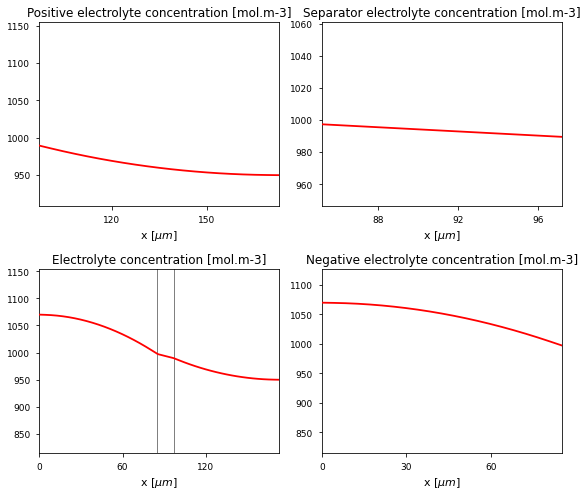

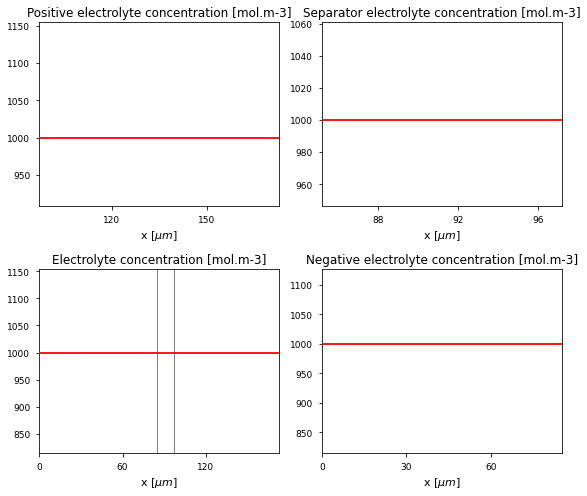

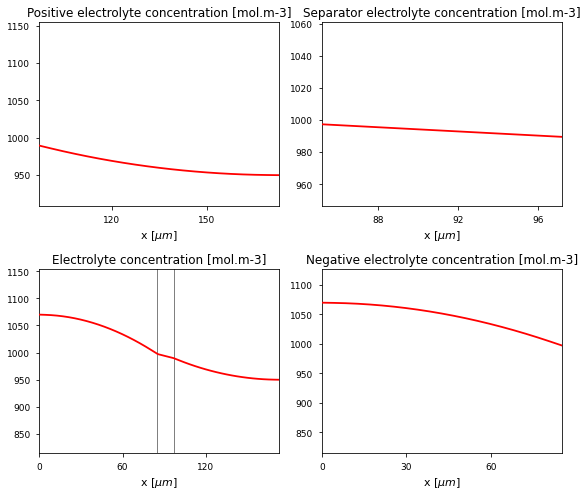

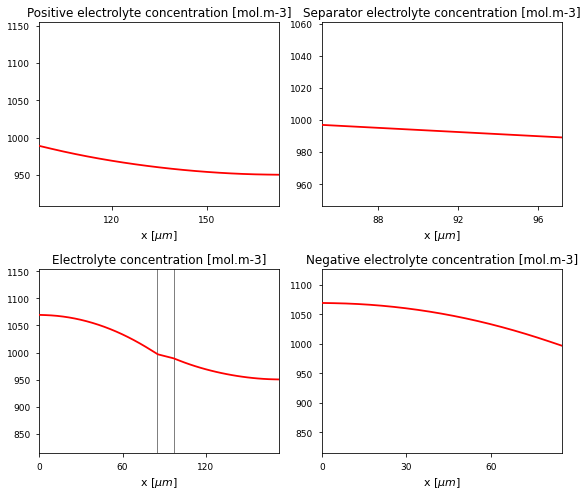

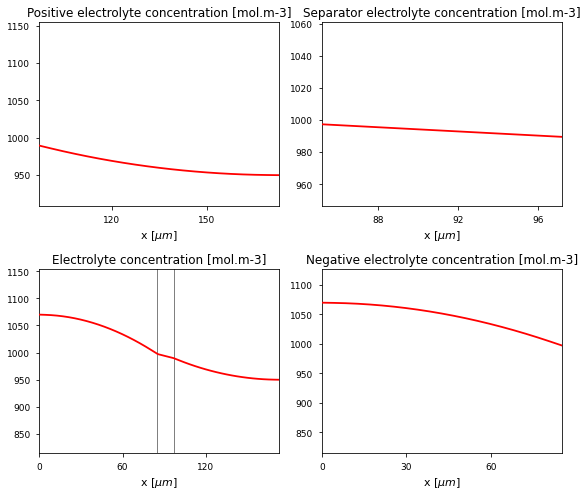

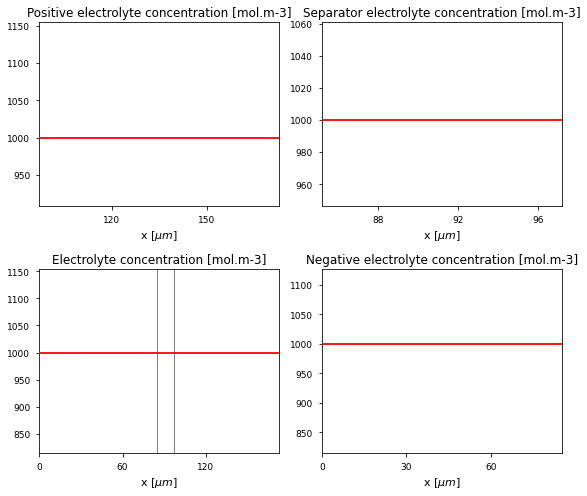

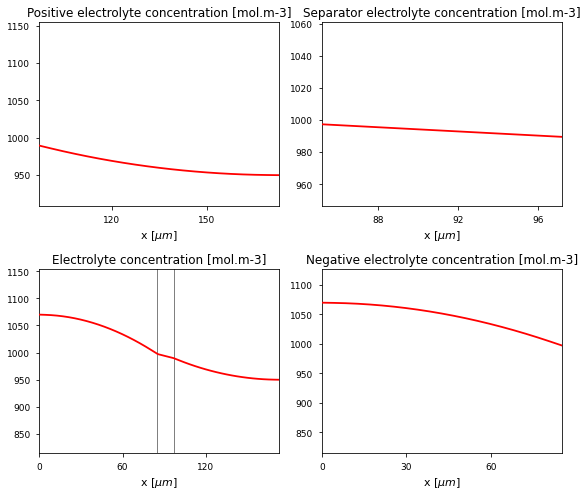

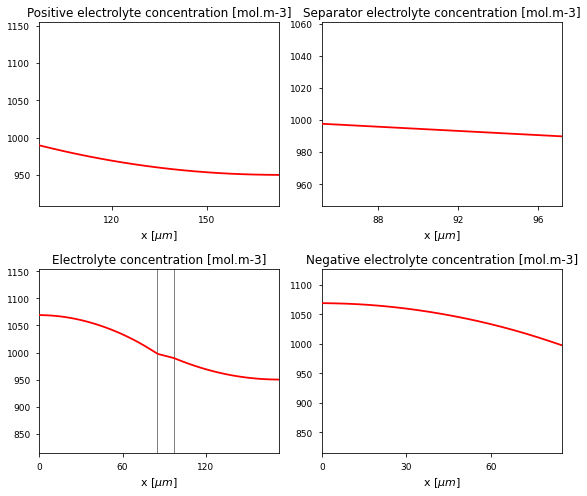

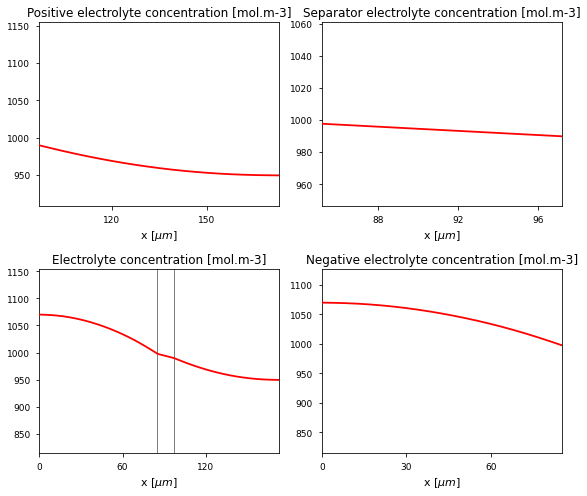

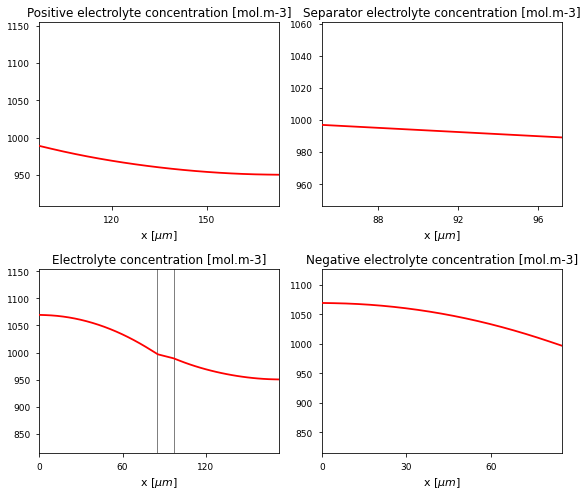

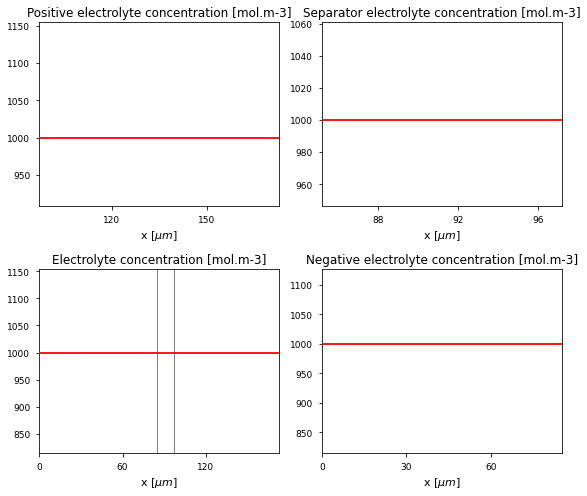

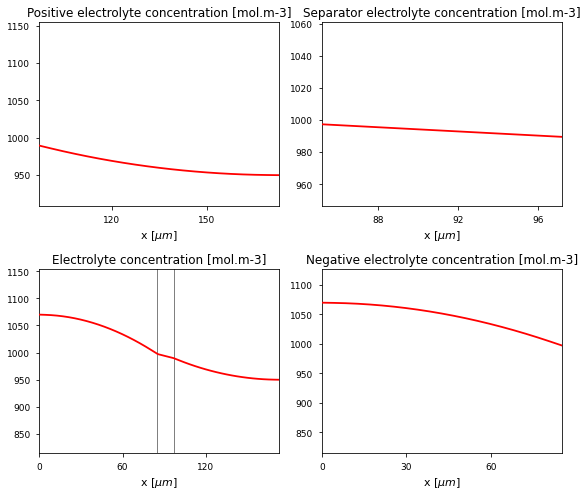

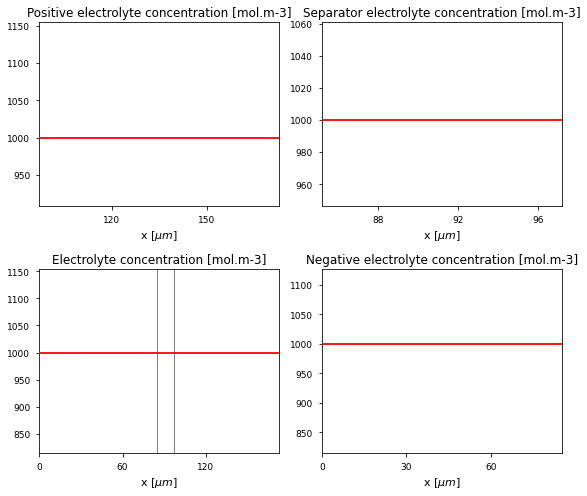

In [17]:
sim.plot(concentration_plots)